Start with autoreload magic; this reloads modules automatically before entering the execution of code and thus enabled development in modules like util.py

In [72]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
import os
from glob import glob
from subprocess import check_call
import config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

import util

In [74]:
obspack_dir = "/glade/work/mclong/sno-analysis/obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18/data/nc"
obspack_filenames = [ # now including aircraft
    f"{obspack_dir}/co2_alt_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_brw_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_cba_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_cgo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_kum_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_ljo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_mlo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_psa_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_smo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_spo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_hip_aircraft-insitu_59_allvalid.nc",
    f"{obspack_dir}/co2_orc_aircraft-insitu_3_allvalid-merge10.nc",
    f"{obspack_dir}/co2_tom_aircraft-insitu_1_allvalid.nc",
    f"{obspack_dir}/co2_gould_shipboard-insitu_1_allvalid.nc",
]

obspack_files = {}
for f in obspack_filenames:
    stn = os.path.basename(f).split('_')[1]
    obspack_files[stn] = os.path.basename(f)

In [75]:
droot = f"{config.project_tmpdir}/simulation-data/TM3-Jena"
os.makedirs(droot, exist_ok=True)
files = [
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_apojena_output1.vGV7.sGV7.tar.gz',
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_co2gridfed_output1.vGV7.sGV7.tar.gz',
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_co2oco2mip_output1.vGV7.sGV7.tar.gz',
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_co2cesm_output1.vGV7.sGV7.tar.gz',
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_co2somffn_output1.vGV7.sGV7.tar.gz',
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_n2cesm_output1.vGV7.sGV7.tar.gz',
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_n2era_output1.vGV7.sGV7.tar.gz',
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_o2gridfed_output1.vGV7.sGV7.tar.gz',
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_o2cesm_output1.vGV7.sGV7.tar.gz',
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_o2gk01r16_output1.vGV7.sGV7.tar.gz',
]


directories = []
for f in files:
    gz_file = f'{droot}/{os.path.basename(f)}'
    tar_file = f'{droot}/{os.path.basename(f)}'.replace('.gz', '')
    final_dir = f'{tar_file}'.replace('.tar', '')

    directories.append(final_dir)

    if not os.path.exists(final_dir):
        if not os.path.exists(tar_file) and not os.path.exists(gz_file):
            print(final_dir)
            continue
            check_call(['wget', f], cwd=droot)

        if not os.path.exists(tar_file) and os.path.exists(gz_file):
            check_call(['gunzip', gz_file], cwd=droot)

        assert os.path.exists(tar_file)
        check_call(['tar', '-xvf', tar_file], cwd=droot)


copying from:
https://ncar.github.io/so-co2-airborne-obs/_prestage-obs/process_surface_models.html

		# encode CarboScope file names
		if(meth=='insitu'){ let1='H' }else if(meth=='flask'){ let1='F' } # First big letter: F = Flask (discrete sampling events), H = Continuous (original hourly, half-hourly, etc.)
		if(type=='surface'){ # Second small letter: Platform / station class
			let2='b' 
			if(sta=='HBA'|sta=='SYO'|sta=='MAA'|sta=='PSA'|sta=='MQA'|sta=='CRZ'|sta=='CGO'|sta=='AMS') let2='r'
			if(sta=='CYA'|sta=='BHD'|sta=='CPT') let2='s'
		}else if(type=='shipboard'){ 
			let2='o' 
		} 
		# Capital letters (or numbers): STATION CODE 
		if(lab=='NOAA'){ # First small letter after station code: Measuring institution
			labcode='c' 
		} else if(lab=='CSIRO'){ 
			labcode='a'
		} else if(lab=='SIO_CDK'){ 
			labcode='k'
		} else if(lab=='SIO_O2'){ 
			labcode='s'
		} else if(lab=='LSCE'){ 
			labcode='l'
		} else if(lab=='TU'|lab=='NIWA'|lab=='SAWS'){ 
			labcode='x'
		} 
		filename=paste(let1,let2,sta,labcode,'o.co2.ts',sep='') # Second small letter after station code (if any): Source data base # o	ObsPack (GLOBALVIEW+)
		stadatin=read.table(paste(modobspackdir,'/simulated-obs',subdir,'/',filename,sep=''))
		names(stadatin)=c('date','year','mon','day','hour','min','sec','lat','lon','hgt','obs','sigma','co2')
		if(filename=='FbSPOko.co2.ts') stadatin=stadatin[stadatin$year>1956,] # first 10 values repeated
		stadat=stadatin[,c(1:7,13)]

and copying from:
https://ncar.github.io/so-co2-airborne-obs/_prestage-obs/process_aircraft_models.html



} else if(substr(model,1,10)=='CarboScope'){

	orcdatin=read.table(paste(modobspackdir,'/simulated-obs',subdir,'/HaORCMERGE10xo.co2.ts',sep=''))
	orcdat=orcdatin[,c(2:7,10,8,9,13)] ; colnames(orcdat)=c('year','mon','day','hour','min','sec','alt','lat','lon','co2')

	tomdatin=read.table(paste(modobspackdir,'/simulated-obs',subdir,'/HaTOMco.co2.ts',sep=''))
	tomdat=tomdatin[,c(2:7,10,8,9,13)] ; colnames(tomdat)=c('year','mon','day','hour','min','sec','alt','lat','lon','co2')

	hipdatin=read.table(paste(modobspackdir,'/simulated-obs',subdir,'/HaHIPxo.co2.ts',sep=''))
	hipdat=hipdatin[,c(2:7,10,8,9,13)] ; colnames(hipdat)=c('year','mon','day','hour','min','sec','alt','lat','lon','co2')

	# need to get obspack_id from row matching obs obspack
	obsobspackdir=paste(project_tmpdir_obs,'/',gvp42dir,sep='') # read in actual data files from same GV+ version, then swap in from single CAMS file
	orcnc=nc_open(paste(obsobspackdir,'/co2_orc_aircraft-insitu_3_allvalid-merge10.nc',sep=''))
	orcdat$obspack_id=ncvar_get(orcnc,'obspack_id')
	hipnc=nc_open(paste(obsobspackdir,'/co2_hip_aircraft-insitu_59_allvalid.nc',sep=''))
	hipdat$obspack_id=ncvar_get(hipnc,'obspack_id')
	obsobspackdir=paste(project_tmpdir_obs,'/',atom40dir,sep='') # ATom file using ATom_v4.0 obspack
	tomnc=nc_open(paste(obsobspackdir,'/co2_tom_aircraft-insitu_1_allvalid.nc',sep=''))
	tomdat$obspack_id=ncvar_get(tomnc,'obspack_id')

(note, obsobspackdir should point to GV+ 7.0 now)
    

### Contribution details
- 10 subdirectories, one each corresponding to requested tracers
- within each of which are 506 records (ObsPack 7.0 has 524 records), each with timeseries (.ts), daily mean (.dmm.ts), and monthly mean (.mm.ts) files 
- CarboScope specific file naming convention (see below)
- Example first three lines (includes 10 requested tracers, plus ACTM and Obs):

 2006.432671 2006  6  7 22 11 47   40.10  -88.55  -4548   383.950       3.07354       346.2692304253578
 
 2006.432702 2006  6  7 22 28 22   40.10  -88.55  -3591   384.370       3.07354       346.2603015899658
 
 2006.432727 2006  6  7 22 41 24   40.10  -88.55  -2960   382.420       3.07354       346.8185317069292

In [76]:
# not using:
def parse_filename(name: str):

    # first letter
    method_def = {"H": "insitu", "F": "flask"}
    assert name[0] in method_def, f"method: unknown code: {name}"

    # second letter
    type_def = {
        'a': 'Aircraft',
        'b': 'Surface, baseline',
        'c': 'Surface, complex',
        'm': 'Surface high mountain',
        'o': 'Ocean shipboard	Moving',
        'r': 'Surface, remote (e.g. islands)',
        's': 'Surface, complex circulation',
        't': 'Tall tower',
        'u': 'Urban',
    }
    assert name[1] in type_def, f"type: unknown code: {name}"

    # capital letters, station code
    station = ""
    for n in range(2, len(name)):
        c = name[n]
        if c.isupper() or c.isnumeric() or c in ["_"]:
            station += c
        else:
            break

    labcode_def = {
        'a': 'CSIRO',
        'b': 'MPI-BGC',
        'c': 'NOAA',
        'd': 'DWD',
        'e': 'UBern',
        'g': 'AGAGE',
        'j': 'JMA',
        'k': 'SIO (CO2 program)',
        'l': 'LSCE',
        'm': 'EC (formerly MSC)',
        'n': 'NIES',
        'p': 'PU',
        'r': 'RUG',
        's': 'SIO (O2 program)',
        't': 'MRI Tsukuba',
        'u': 'UBA',
        'v': 'Voeikov Main Geophysical Observatory',
        'x': 'all others',
    }
    assert name[n] in labcode_def, f"lab: unknown code: {name}"

    # need to add?
    # Second small letter after station code (if any): Source data base # o	ObsPack (GLOBALVIEW+)
    # e.g. FrCBAco.co2.ts
    
    attrs = {
        "method": method_def[name[0]],
        "type": type_def[name[1]],
        "station": station,
        'institution': labcode_def[name[n]],
    }
    return attrs


for dirin in directories:
    files = sorted(glob(f"{dirin}/*o.co2.ts"))

    for f in files:
        basename = os.path.basename(f)
        attrs = parse_filename(basename)


In [77]:
# need the reverse of prior cell:
#def create_filename(method, type, station, institution)
# return filename

# for now, hard code file names:
jena_dict = { 
    'alt' : 'FrALTso.co2.ts',
    'brw' : 'FrBRWso.co2.ts',
    'cba' : 'FrCBAso.co2.ts',
    'cgo' : 'FrCGOso.co2.ts',
    'kum' : 'FrKUMso.co2.ts',
    'ljo' : 'FrLJOso.co2.ts',
    'mlo' : 'FrMLOso.co2.ts',
    'psa' : 'FrPSAso.co2.ts',
    'smo' : 'FrSMOso.co2.ts',
    'spo' : 'FrSPOso.co2.ts',
    'hip' : 'HaHIPxo.co2.ts',
    'orc' : 'HaORCMERGE10xo.co2.ts',
    'tom' : 'HaTOMco.co2.ts',
    'gould' : 'HoGOULDco.co2.ts',
}

#Scripps flask CBA and PSA
filename1 = jena_dict['cba']
filename2 = jena_dict['psa']

In [78]:
droot = f"{config.project_tmpdir}/simulation-data/TM3-Jena"

# should parse tracer names out of file names above, hard coding here
tracers = [
    'apojena', 'co2cesm', 'co2gridfed', 'co2oco2mip', 'co2somffn', 
    'n2cesm', 'n2era', 'o2cesm', 'o2gk01r16', 'o2gridfed'
]

dtracer = f"PRI_{tracers[0]}_output1.vGV7.sGV7"
path = f"{droot}/{dtracer}/{filename1}"
print(path)
df = pd.read_csv(path, delim_whitespace=True, header=None) # , na_values=-599.0000)
print(df.shape)
df.columns = ['year.frac', 'year', 'month', 'day', 'hour', 'minute', 'second', 'lat', 'lon', 'hgt', 'obs', 'sigma', tracers[0]] 

for t in tracers[1:]:
    
    dtracer = f"PRI_{t}_output1.vGV7.sGV7"
    path = f"{droot}/{dtracer}/{filename1}"
    print(path)
    
    tmp = pd.read_csv(path, delim_whitespace=True, header=None) # , na_values=-599.0000)
    tmp.columns = ['year.frac', 'year', 'month', 'day', 'hour', 'minute', 'second', 'lat', 'lon', 'hgt', 'obs', 'sigma', t] 
    df[t] = tmp[t]
    
#df['time'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
#df = df.set_index('time')
#df = df.dropna()
df = df.rename({'apojena': 'apo_jena', 'co2cesm': 'co2_cesm', 'co2gridfed': 'co2_gridfed', 'co2oco2mip': 'co2_oco2mip', 'co2somffn': 'co2_somffn', 
    'n2cesm': 'n2_cesm', 'n2era': 'n2_era', 'o2cesm': 'o2_cesm', 'o2gk01r16': 'o2_gk01r16', 'o2gridfed': 'o2_gridfed'}, axis=1)

# merge into original ObsPack, to allow outputting for other uses
path = f"{obspack_dir}/{obspack_files['cba']}"
print(path)
ds = xr.open_dataset(path)

sno_vars = [
    'apo_jena',
    'o2_cesm', 
    'o2_gk01r16',  
    'o2_gridfed',   
    'co2_cesm', 
    'co2_somffn', 
    'co2_gridfed', 
    'co2_oco2mip', 
    'n2_cesm', 
    'n2_era', 
]

assert df.shape[0] == ds.dims['obs']

for v in sno_vars:
    ds[v]=df[v]

# get time as coordinate
time = ds.time
time.name = 'obs'
ds['obs'] = time
ds = ds.drop('time').rename({'obs': 'time'})
ds['dim_0'] = ds['time']
ds = ds.drop('time').rename({'dim_0': 'time'})

#ds = ds.drop_dims('dim_0')
    
ds.to_netcdf(f"inverse_model_obspack_files/TM3-Jena/{obspack_files['cba']}")

/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_apojena_output1.vGV7.sGV7/FrCBAso.co2.ts
(553, 13)
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_co2cesm_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_co2gridfed_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_co2oco2mip_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_co2somffn_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_n2cesm_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_n2era_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_o2cesm_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_o2gk01r16_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-dat

In [79]:
# cutting and pasting here - need to make station dynamic:
dtracer = f"PRI_{tracers[0]}_output1.vGV7.sGV7"
path = f"{droot}/{dtracer}/{filename2}"
print(path)
df2 = pd.read_csv(path, delim_whitespace=True, header=None) # , na_values=-599.0000)
df2.columns = ['year.frac', 'year', 'month', 'day', 'hour', 'minute', 'second', 'lat', 'lon', 'hgt', 'obs', 'sigma', tracers[0]] 

for t in tracers[1:]:
    
    dtracer = f"PRI_{t}_output1.vGV7.sGV7"
    path = f"{droot}/{dtracer}/{filename2}"

    print(path)
    
    tmp = pd.read_csv(path, delim_whitespace=True, header=None) # , na_values=-599.0000)
    tmp.columns = ['year.frac', 'year', 'month', 'day', 'hour', 'minute', 'second', 'lat', 'lon', 'hgt', 'obs', 'sigma', t] 
    df2[t] = tmp[t]
    
#df2['time'] = pd.to_datetime(df2[['year', 'month', 'day', 'hour', 'minute']])
#df2 = df2.set_index('time')
#df2 = df2.dropna()
df2 = df2.rename({'apojena': 'apo_jena', 'co2cesm': 'co2_cesm', 'co2gridfed': 'co2_gridfed', 'co2oco2mip': 'co2_oco2mip', 'co2somffn': 'co2_somffn', 
    'n2cesm': 'n2_cesm', 'n2era': 'n2_era', 'o2cesm': 'o2_cesm', 'o2gk01r16': 'o2_gk01r16', 'o2gridfed': 'o2_gridfed'}, axis=1)

# merge into original ObsPack, to allow outputting for other uses
path = f"{obspack_dir}/{obspack_files['psa']}"
print(path)
ds2 = xr.open_dataset(path)

assert df2.shape[0] == ds2.dims['obs']

for v in sno_vars:
    ds2[v]=df2[v]

# get time as coordinate
time = ds2.time
time.name = 'obs'
ds2['obs'] = time
ds2 = ds2.drop('time').rename({'obs': 'time'})
ds2['dim_0'] = ds2['time']
ds2 = ds2.drop('time').rename({'dim_0': 'time'})

#ds = ds.drop_dims('dim_0')
    
ds2.to_netcdf(f"inverse_model_obspack_files/TM3-Jena/{obspack_files['psa']}")

/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_apojena_output1.vGV7.sGV7/FrPSAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_co2cesm_output1.vGV7.sGV7/FrPSAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_co2gridfed_output1.vGV7.sGV7/FrPSAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_co2oco2mip_output1.vGV7.sGV7/FrPSAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_co2somffn_output1.vGV7.sGV7/FrPSAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_n2cesm_output1.vGV7.sGV7/FrPSAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_n2era_output1.vGV7.sGV7/FrPSAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_o2cesm_output1.vGV7.sGV7/FrPSAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_o2gk01r16_output1.vGV7.sGV7/FrPSAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena

In [80]:
# subtract off background value

""" 
For technical reasons (because the runs have formally been done as CO2
runs to be able to use the CO2 obspack input), an initial condition of

    347.0120 ppm

has been added to the output files (but the actual transport runs have
been done from a zero atmosphere).
"""

sno_vars = [
    'apo_jena',
    'o2_cesm', 
    'o2_gk01r16',  
    'o2_gridfed',   
    'co2_cesm', 
    'co2_somffn', 
    'co2_gridfed', 
    'co2_oco2mip', 
    'n2_cesm', 
    'n2_era', 
]

for v in sno_vars:
    ds[v]=ds[v]-347.0120
    ds2[v]=ds2[v]-347.0120

In [81]:
# add derived APO variables

ds['apo_cesm'] = util.compute_apo (
    o2=ds['o2_cesm'],
    co2=ds['co2_cesm'],
    n2=ds['n2_cesm']
)

ds['apo_diss'] = util.compute_apo (
    o2=ds['o2_gk01r16'],
    co2=ds['co2_somffn'],
    n2=ds['n2_era']
)

ds['apo_gridfed'] = util.compute_apo (
    o2=ds['o2_gridfed'],
    co2=ds['co2_gridfed'],
    n2=0.0
)

ds['apo_oco2mip'] = util.compute_apo (
    o2=ds['co2_oco2mip'] * -1.4,
    co2=ds['co2_oco2mip'],
    n2=0.0
)

# kluge - need to make station name dynamic and allow any number of stations
ds2['apo_cesm'] = util.compute_apo (
    o2=ds2['o2_cesm'],
    co2=ds2['co2_cesm'],
    n2=ds2['n2_cesm']
)

ds2['apo_diss'] = util.compute_apo (
    o2=ds2['o2_gk01r16'],
    co2=ds2['co2_somffn'],
    n2=ds2['n2_era']
)

ds2['apo_gridfed'] = util.compute_apo (
    o2=ds2['o2_gridfed'],
    co2=ds2['co2_gridfed'],
    n2=0.0
)

ds2['apo_oco2mip'] = util.compute_apo (
    o2=ds2['co2_oco2mip'] * -1.4,
    co2=ds2['co2_oco2mip'],
    n2=0.0
)

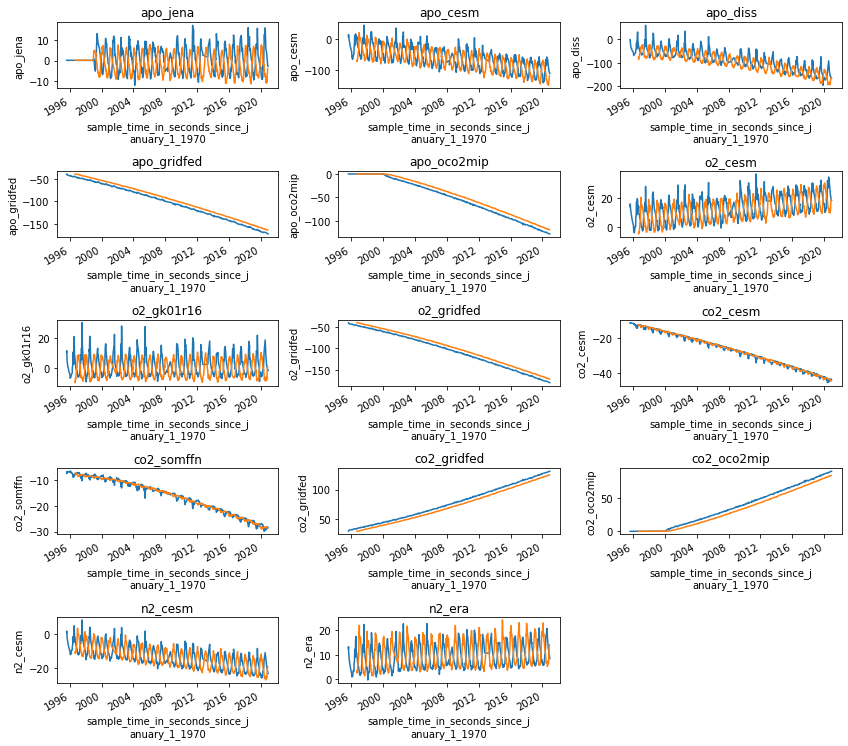

In [82]:
# make plots

sno_vars = [
    'apo_jena',
    'apo_cesm',
    'apo_diss',
    'apo_gridfed',
    'apo_oco2mip',
    'o2_cesm', 
    'o2_gk01r16',  
    'o2_gridfed',   
    'co2_cesm', 
    'co2_somffn', 
    'co2_gridfed', 
    'co2_oco2mip', 
    'n2_cesm', 
    'n2_era', 
]

n_plots = len(sno_vars)
ncol = int(np.sqrt(n_plots))
nrow = int(((n_plots / ncol) + n_plots % ncol))
fig, axs = plt.subplots(nrow, ncol, figsize=(12, 12), squeeze=False)

for n, v in enumerate(sno_vars):
    ip, jp = np.unravel_index(n, axs.shape)
    
    ax = axs[ip, jp]
    ds[v].plot(ax=ax)
    ds2[v].plot(ax=ax)
    ax.set_title(v)

plt.tight_layout();    

for n in range(n+1, nrow*ncol):
    ip, jp = np.unravel_index(n, (nrow, ncol))
    axs[ip, jp].remove()

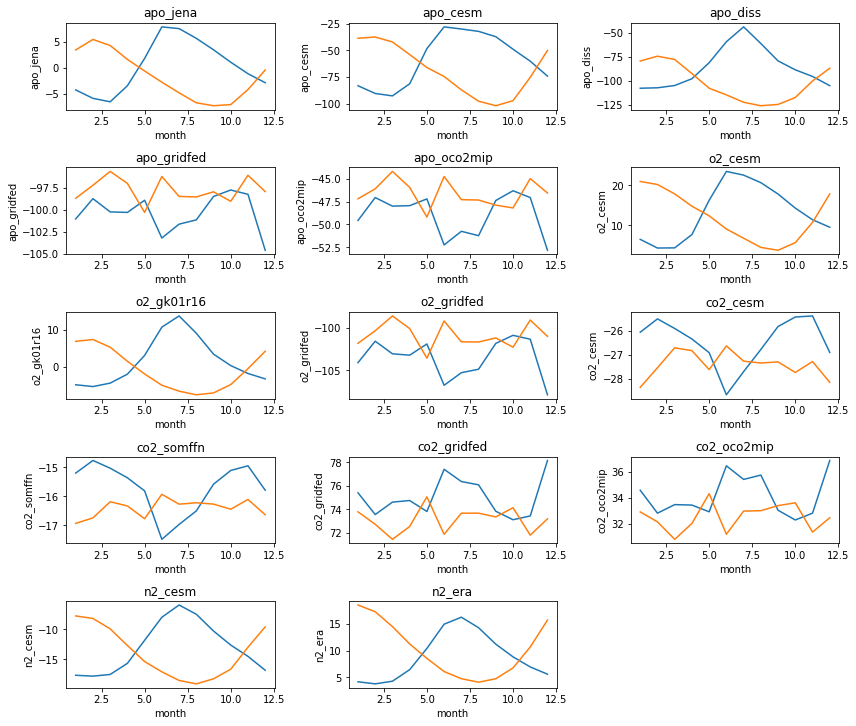

In [83]:
# seasonal climatology
ds_seas=ds.groupby('time.month').mean('time')
ds_seas['apo_cesm']

# kluge - need to make station name dynamic and allow any number of stations
ds2_seas=ds2.groupby('time.month').mean('time')
ds2_seas['apo_cesm']

fig, axs = plt.subplots(nrow, ncol, figsize=(12, 12), squeeze=False)

for n, v in enumerate(sno_vars):
    ip, jp = np.unravel_index(n, axs.shape)
    
    ax = axs[ip, jp]
    ds_seas[v].plot(ax=ax)
    ds2_seas[v].plot(ax=ax)
    ax.set_title(v)

plt.tight_layout();    

for n in range(n+1, nrow*ncol):
    ip, jp = np.unravel_index(n, (nrow, ncol))
    axs[ip, jp].remove()
    